# Water potability classification 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv(r'file:///C:/Users/Admin/Documents/01_Learnbay/02_MyProjects/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [41]:
df.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ph,2785.0,7.080795,1.594320,0.000000,3.406797,4.487971,5.106286,6.093092,7.036752,8.062066,9.078356,9.789819,10.895339,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,114.236366,141.763281,155.223964,176.850538,196.967627,216.667456,236.350707,249.609769,278.062602,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,5416.238724,9545.812579,11740.528189,15666.690297,20927.833607,27332.762127,33814.935230,38474.990249,45974.106490,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,3.203082,4.503054,5.181271,6.127421,7.130299,8.114887,9.122578,9.753101,10.967153,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,232.499338,266.616232,283.147302,307.699498,333.073546,359.950170,385.966882,403.070190,434.021991,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,269.422947,300.109466,325.117124,365.734414,421.884968,481.792304,533.297241,566.349320,617.626558,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,6.452487,8.815362,10.123765,12.065801,14.218338,16.557652,18.504567,19.637254,22.090049,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,27.759075,39.552928,45.845615,55.844536,66.622485,77.337473,86.491600,92.124059,104.739231,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,2.161414,2.684279,2.951803,3.439711,3.955028,4.500320,4.977141,5.220925,5.741640,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Pearson's correlation heatmap

<AxesSubplot:>

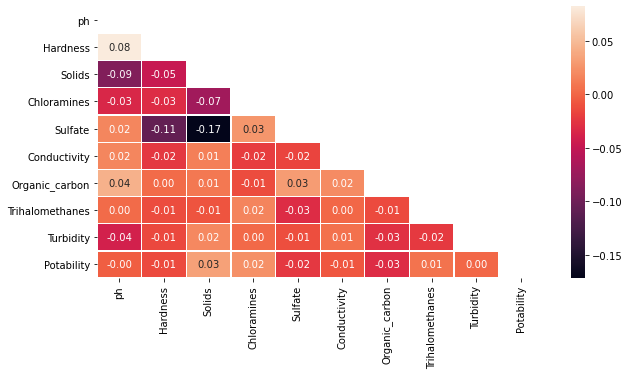

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2F',linewidths=0.3,mask=np.triu(df.corr()))

***
From above heatmap,
- There is no multicollinearity exists between the features.
- Correlation coeffiecient of features w.r.t potability is very low which indicates there is no linearity
***

## Pairplots of features

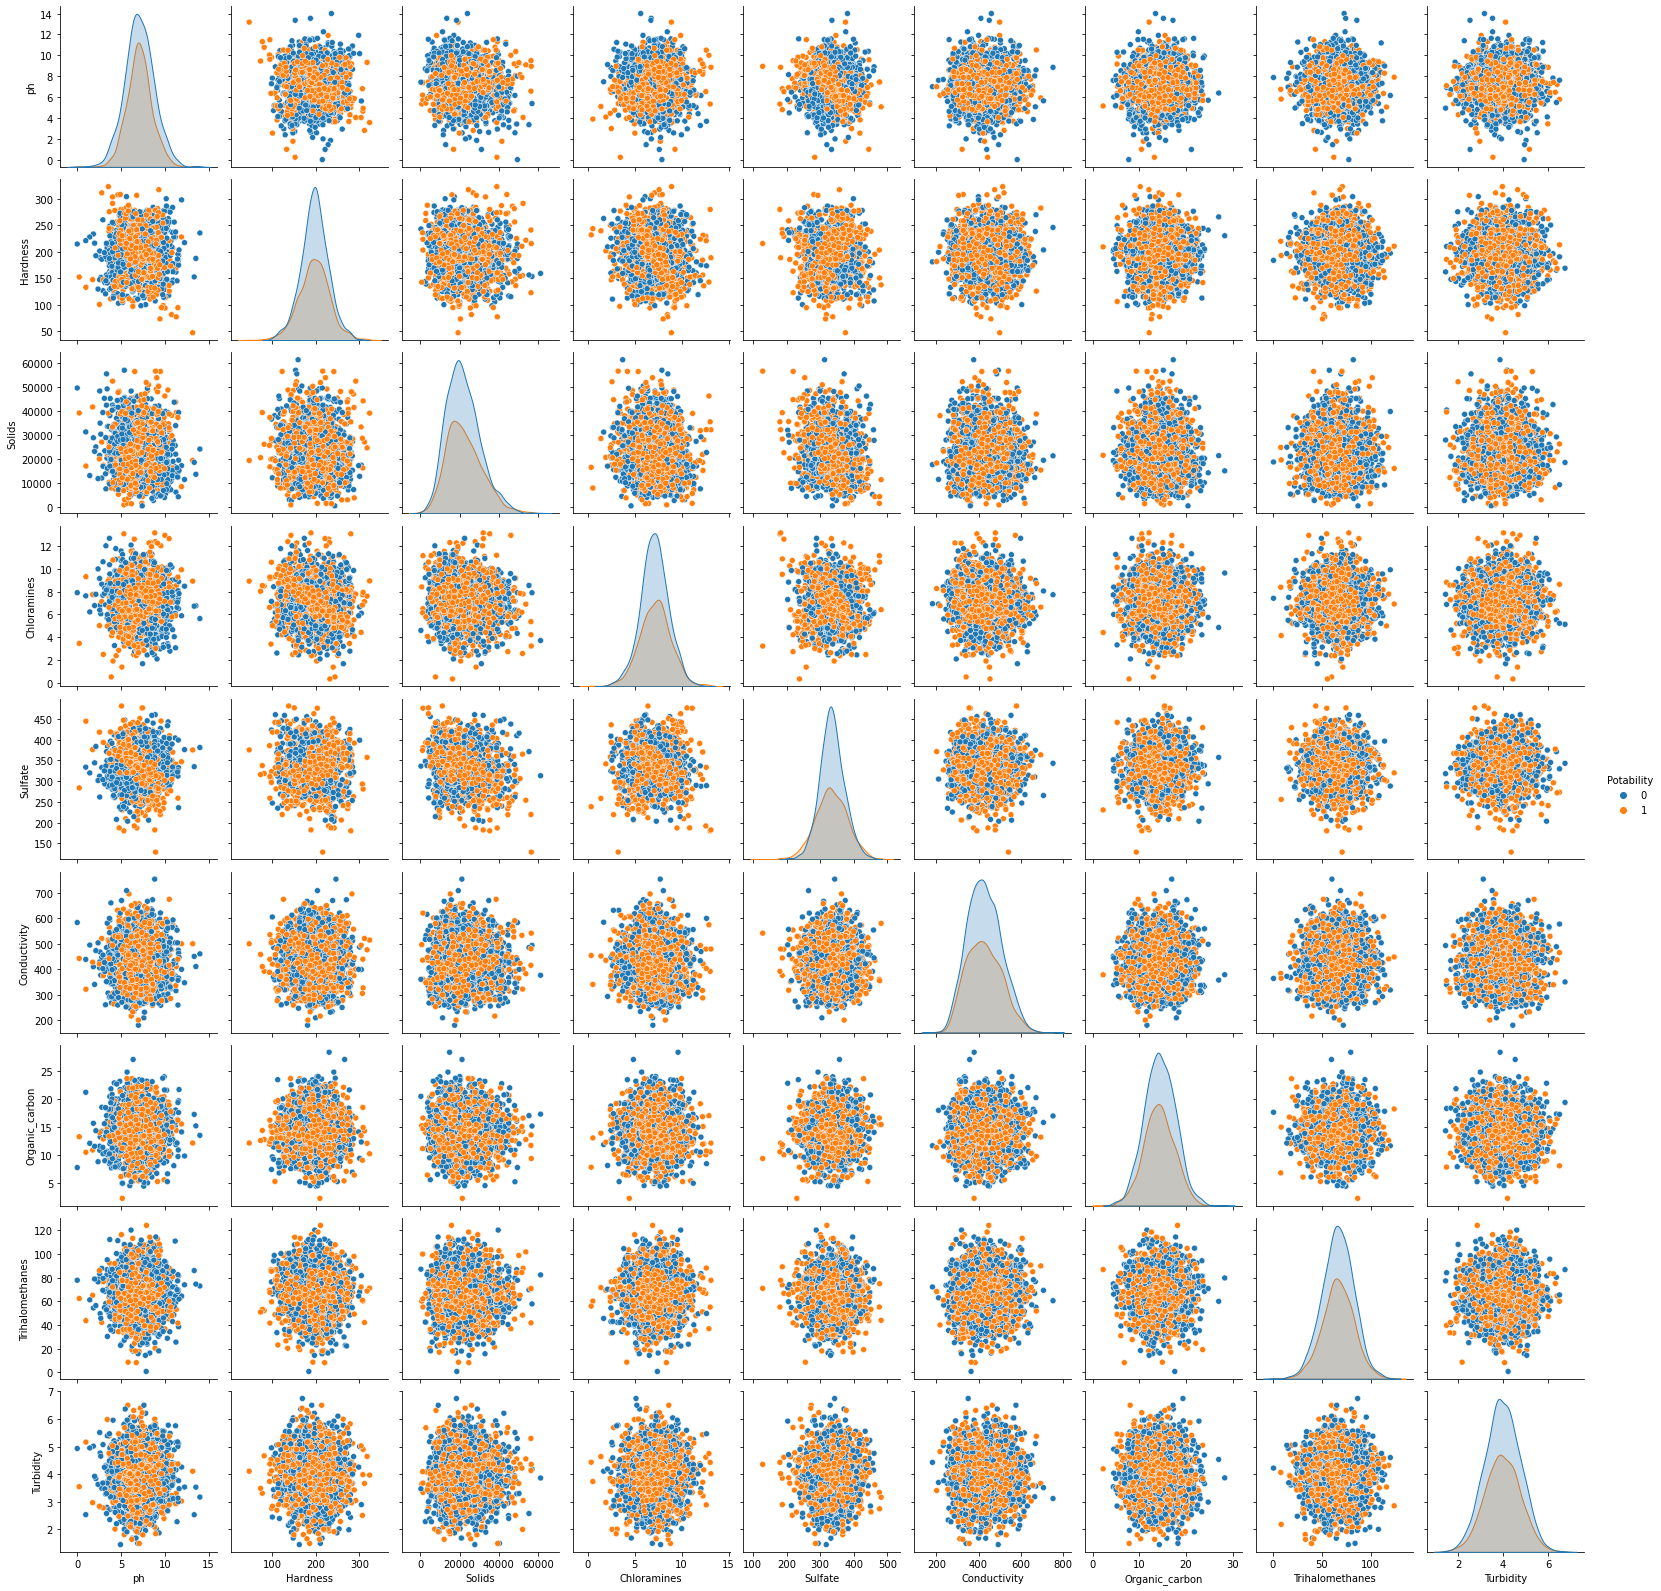

In [43]:
sns.pairplot(df,hue='Potability')

From above pairplot,    
we can observe that there is no features in which we can simply draw a line to classify potability.

## Check duplicates

In [44]:
df.duplicated().sum()

0

## distribution plots of features

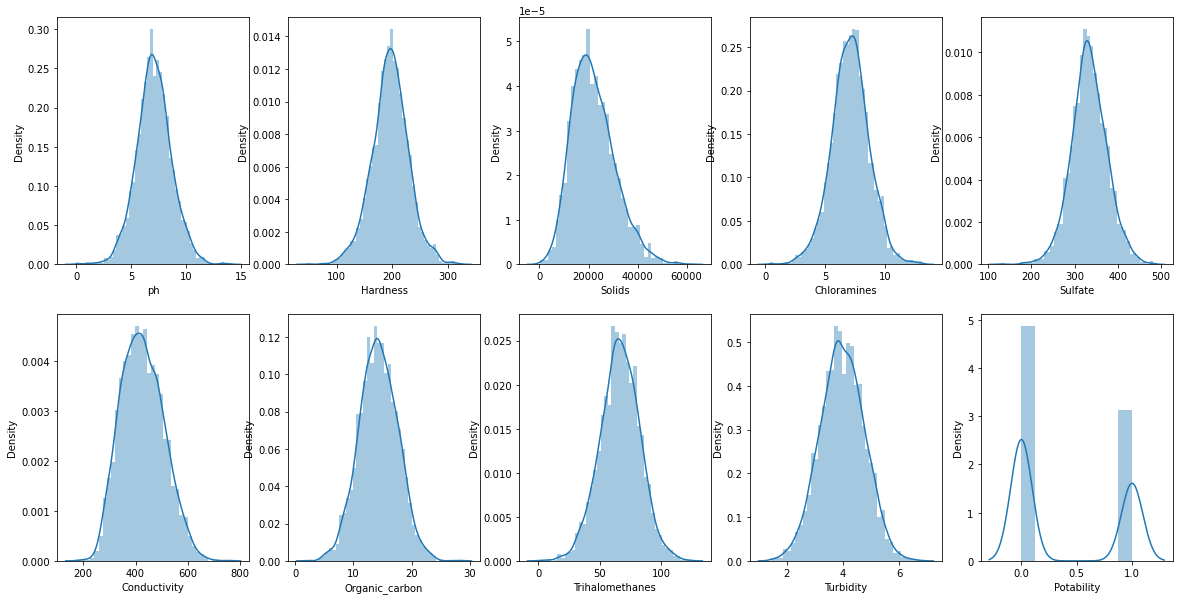

In [45]:
plt.figure(figsize=(20,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,5,i)
    sns.distplot(df[col])

In [46]:
df.dropna(axis=0,inplace=True)

## Defining target and independent variables.

In [47]:
X=df.drop(['Potability'],axis=1)
y=df['Potability']

## Outlier capping

In [48]:
def out_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return (x)

In [49]:
X=X.apply(lambda x:out_cap(x))

In [50]:
X.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ph,2011.0,7.087844,1.523513,3.433972,3.434061,4.609257,5.141507,6.089723,7.027297,8.052969,9.066628,9.798719,10.810694,10.810976
Hardness,2011.0,196.024353,32.019325,113.885146,113.933776,141.308656,154.546949,176.744938,197.191839,216.441070,236.034783,248.846265,276.727146,276.730188
Solids,2011.0,21899.600011,8468.207923,6072.488970,6076.119646,9552.838304,11746.607522,15615.665390,20933.512750,27182.587067,33653.761963,38270.348035,45211.943706,45216.947213
Chloramines,2011.0,7.131579,1.546949,3.143716,3.147462,4.545493,5.215862,6.138895,7.143907,8.109726,9.158704,9.757187,11.063886,11.070985
Sulfate,2011.0,333.320502,39.972627,230.605639,230.650444,267.731267,283.270495,307.632511,332.232177,359.330555,384.821967,401.503112,433.367102,433.405502
Conductivity,2011.0,426.344250,79.405235,269.583552,269.704603,300.479836,325.099756,366.680307,423.455906,482.373169,531.602634,564.720525,617.174256,617.347933
Organic_carbon,2011.0,14.354715,3.273498,6.069578,6.075083,8.947169,10.213058,12.124105,14.322019,16.683049,18.545903,19.638982,22.130844,22.135162
Trihalomethanes,2011.0,66.412659,15.726898,28.890105,28.900458,39.598121,45.668318,55.952664,66.542198,77.291925,86.185058,91.647528,105.086360,105.123989
Turbidity,2011.0,3.969275,0.765618,2.150319,2.151855,2.690064,2.942348,3.442915,3.968177,4.514175,4.962900,5.199656,5.749958,5.754087


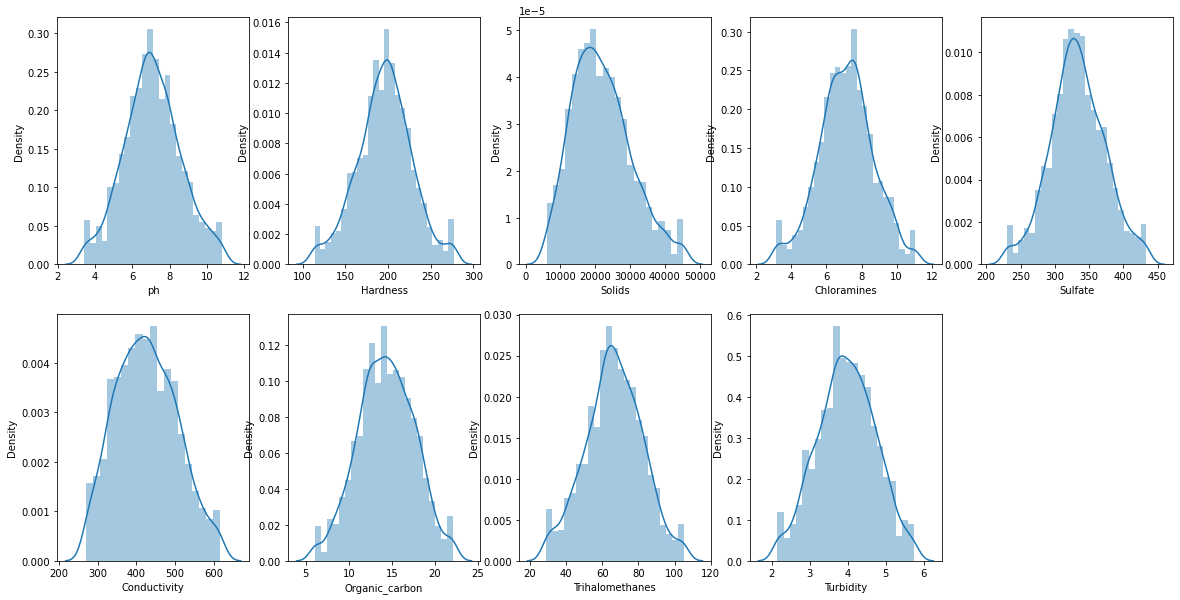

In [51]:
plt.figure(figsize=(20,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(2,5,i)
    sns.distplot(X[col])

## Checking missing values

In [52]:
pd.concat([pd.DataFrame(X.isnull().sum(),columns=['Na_Count']),pd.DataFrame(round(X.isnull().sum()/X.shape[0]*100,2),columns=['% Na_Count'])],axis=1)

,Na_Count,% Na_Count
ph,0,0.0
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Sulfate,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Trihalomethanes,0,0.0
Turbidity,0,0.0


## Missing value imputation using KNNImputer

In [53]:
'''from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X.head()'''

'from sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=5)\nX=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)\nX.head()'

In [54]:
pd.concat([pd.DataFrame(X.isnull().sum(),columns=['Na_Count']),pd.DataFrame(round(X.isnull().sum()/X.shape[0]*100,2),columns=['% Na_Count'])],axis=1)

,Na_Count,% Na_Count
ph,0,0.0
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Sulfate,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Trihalomethanes,0,0.0
Turbidity,0,0.0


## Scaling data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.806838,0.573204,0.014034,0.599880,0.589691,-0.794575,1.247236,2.157924,0.861605
1,1.315958,-0.466173,-0.463095,-0.378244,-0.580160,-0.351871,-0.854478,-2.188812,0.138225
2,-0.987278,-0.240884,0.809001,0.267231,-0.166209,-1.837569,-1.819601,-0.731082,-1.841541
3,2.058925,1.625903,0.809123,0.246889,1.509981,-1.797465,-0.172647,1.156962,-1.693545
4,1.016329,0.229205,-0.971818,-1.660823,-0.750969,0.607962,-0.608338,-0.229877,0.564587


## Target variable value counts

0    1200
1     811
Name: Potability, dtype: int64
------------------------------------------------


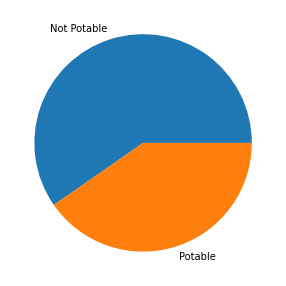

In [56]:
print(df.Potability.value_counts())
print('------------------------------------------------')
plt.figure(figsize=(5,5))
plt.pie(df.Potability.value_counts(),labels=['Not Potable','Potable'])
plt.show()

## Train test data split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [59]:
print('Response rate in train data',y_train.mean())
print('Response rate in test data',y_test.mean())

Response rate in train data 0.39800995024875624
Response rate in test data 0.42431761786600497


## Model Building

### Logistic regression model

In [60]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(random_state=13)
log_clf.fit(X,y)

LogisticRegression(random_state=13)

#### Result summary function

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def results(clf,X_train,y_train,X_test,y_test):
    print('========================================================================')
    print('Train data result summary')
    print('========================================================================')
    y_pred=clf.predict(X_train)
    score=accuracy_score(y_train,y_pred)
    c_matrix=confusion_matrix(y_train,y_pred)
    c_report=classification_report(y_train,y_pred,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))
    
    print('\n========================================================================')
    print('Test data result summary')
    print('========================================================================')
    y_pred1=clf.predict(X_test)
    score=accuracy_score(y_test,y_pred1)
    c_matrix=confusion_matrix(y_test,y_pred1)
    c_report=classification_report(y_test,y_pred1,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))

#### Evaluation:

In [62]:
results(log_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.6038557213930348
Confusion matrix : 


,0,1
0,968,0
1,637,3


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.603115,1.000000,0.603856,0.801558,0.761079
recall,1.000000,0.004687,0.603856,0.502344,0.603856
f1-score,0.752429,0.009331,0.603856,0.380880,0.456669
support,968.000000,640.000000,0.603856,1608.000000,1608.000000



Test data result summary
Accuracy score : 
0.575682382133995
Confusion matrix : 


,0,1
0,232,0
1,171,0


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.575682,0.0,0.575682,0.287841,0.331410
recall,1.000000,0.0,0.575682,0.500000,0.575682
f1-score,0.730709,0.0,0.575682,0.365354,0.420656
support,232.000000,171.0,0.575682,403.000000,403.000000


### Decision Tree Classifier

#### Hyper parameter tuning

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
params={'criterion':['gini','entropy'],
        'max_depth':[10,20,30,50,75,100],#'min_samples_split':range(1,5),
       'min_samples_leaf': [10,20,30,50,75,100],#'splitter':['best','random']
       }
grid_DT=GridSearchCV(DecisionTreeClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_DT.fit(X_train,y_train)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)
DT_clf=grid_DT.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.5s


0.48125
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20)


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.5s finished


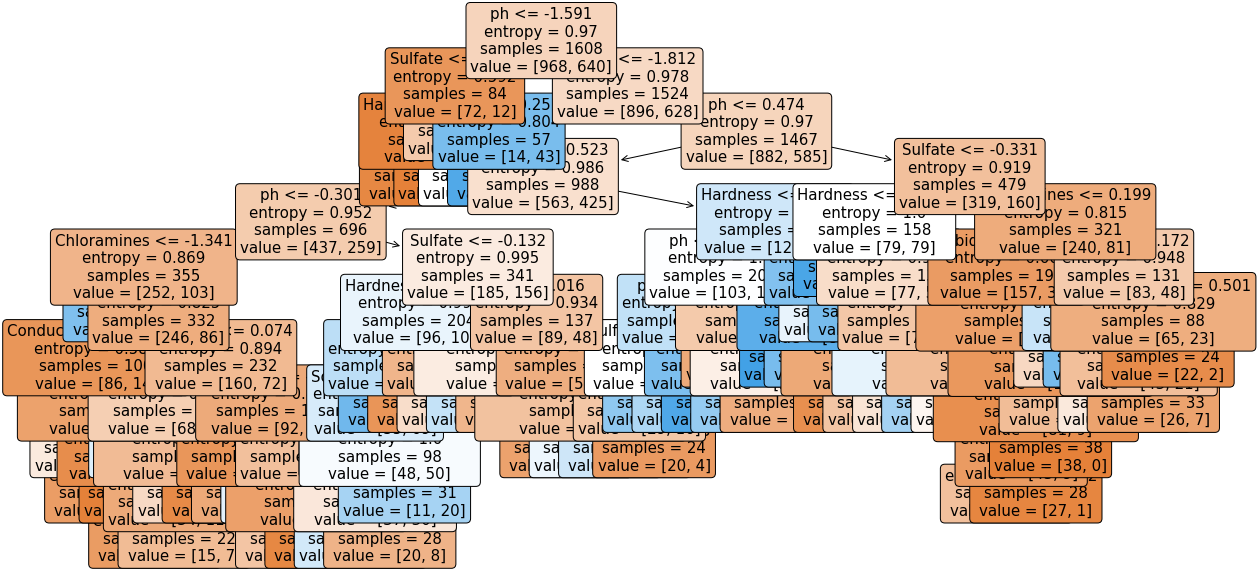

In [64]:
from sklearn import tree
import pydotplus
plt.figure(figsize=[20,10])
tree.plot_tree(DT_clf,filled=True,fontsize=15,rounded=True,feature_names=X.columns)
plt.show()

#### Evaluation:

In [67]:
results(DT_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.7450248756218906
Confusion matrix : 


,0,1
0,788,180
1,230,410


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.774067,0.694915,0.745025,0.734491,0.742564
recall,0.814050,0.640625,0.745025,0.727337,0.745025
f1-score,0.793555,0.666667,0.745025,0.730111,0.743052
support,968.000000,640.000000,0.745025,1608.000000,1608.000000



Test data result summary
Accuracy score : 
0.6253101736972705
Confusion matrix : 


,0,1
0,159,73
1,78,93


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.670886,0.560241,0.62531,0.615564,0.623937
recall,0.685345,0.543860,0.62531,0.614602,0.625310
f1-score,0.678038,0.551929,0.62531,0.614984,0.624528
support,232.000000,171.000000,0.62531,403.000000,403.000000


### Random Forest Classifier

#### Hyper parameter tuning

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
params={'n_estimators':[50,100,200,300,500],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,50,75,100],
       #'min_samples_split':range(1,5),
       'min_samples_leaf': [10,20,50,75,100],
       }
grid_RF=GridSearchCV(RandomForestClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_RF.fit(X_train,y_train)
print(grid_RF.best_score_)
print(grid_RF.best_estimator_)
RF_clf=grid_RF.best_estimator_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 12.3min finished


0.3390625
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50)


#### Evaluation

In [73]:
results(RF_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.8544776119402985
Confusion matrix : 


,0,1
0,943,25
1,209,431


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.818576,0.945175,0.854478,0.881876,0.868964
recall,0.974174,0.673438,0.854478,0.823806,0.854478
f1-score,0.889623,0.786496,0.854478,0.838059,0.848577
support,968.000000,640.000000,0.854478,1608.000000,1608.000000



Test data result summary
Accuracy score : 
0.6501240694789082
Confusion matrix : 


,0,1
0,197,35
1,106,65


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.650165,0.650000,0.650124,0.650083,0.650095
recall,0.849138,0.380117,0.650124,0.614627,0.650124
f1-score,0.736449,0.479705,0.650124,0.608077,0.627508
support,232.000000,171.000000,0.650124,403.000000,403.000000


### Ada Boost Classifier

#### Hyper parameter tuning

In [74]:
from sklearn.ensemble import AdaBoostClassifier
params={'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.01,0.1,0.2,0.3]}

grid_Ada=GridSearchCV(AdaBoostClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_Ada.fit(X_train,y_train)
print(grid_Ada.best_score_)
print(grid_Ada.best_estimator_)
Ada_clf=grid_Ada.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.9s finished


0.26875
AdaBoostClassifier(learning_rate=0.3, n_estimators=500)


#### Evaluation

In [75]:
results(Ada_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.6946517412935324
Confusion matrix : 


,0,1
0,863,105
1,386,254


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.690953,0.707521,0.694652,0.699237,0.697547
recall,0.891529,0.396875,0.694652,0.644202,0.694652
f1-score,0.778530,0.508509,0.694652,0.643519,0.671058
support,968.000000,640.000000,0.694652,1608.000000,1608.000000



Test data result summary
Accuracy score : 
0.5682382133995038
Confusion matrix : 


,0,1
0,185,47
1,127,44


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.592949,0.483516,0.568238,0.538233,0.546515
recall,0.797414,0.257310,0.568238,0.527362,0.568238
f1-score,0.680147,0.335878,0.568238,0.508012,0.534068
support,232.000000,171.000000,0.568238,403.000000,403.000000


### Gradient Boosting Classifier

#### Hyper parameter tuning

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
params={'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.01,0.1,0.2,0.3],
        'max_depth':[10,20,50,70,85,100],
        #'subsample':[0.1,0.2,0.5,0.7]
       }

grid_GB=GridSearchCV(GradientBoostingClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_GB.fit(X_train,y_train)
print(grid_GB.best_score_)
print(grid_GB.best_estimator_)
GB_clf=grid_GB.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 33.5min finished


0.4921875
GradientBoostingClassifier(learning_rate=0.2, max_depth=50, n_estimators=150)


#### Evaluation

In [78]:
results(GB_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
1.0
Confusion matrix : 


,0,1
0,968,0
1,0,640


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,968.0,640.0,1.0,1608.0,1608.0



Test data result summary
Accuracy score : 
0.5632754342431762
Confusion matrix : 


,0,1
0,138,94
1,82,89


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.627273,0.486339,0.563275,0.556806,0.567472
recall,0.594828,0.520468,0.563275,0.557648,0.563275
f1-score,0.610619,0.502825,0.563275,0.556722,0.564880
support,232.000000,171.000000,0.563275,403.000000,403.000000


### Xgbooster Classifier

#### Hyper parameter tuning

In [79]:
from xgboost import XGBClassifier
params={'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.01,0.1,0.2,0.3],
        'max_depth':[10,20,35,50,70,85,100]}

grid_XG=GridSearchCV(XGBClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_XG.fit(X_train,y_train)
print(grid_XG.best_score_)
print(grid_XG.best_estimator_)
XG_clf=grid_XG.best_estimator_

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 12.0min finished


[13:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4796875
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Evaluation

In [80]:
results(XG_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.9521144278606966
Confusion matrix : 


,0,1
0,944,24
1,53,587


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.946841,0.960720,0.952114,0.953780,0.952365
recall,0.975207,0.917188,0.952114,0.946197,0.952114
f1-score,0.960814,0.938449,0.952114,0.949632,0.951913
support,968.000000,640.000000,0.952114,1608.000000,1608.000000



Test data result summary
Accuracy score : 
0.6277915632754343
Confusion matrix : 


,0,1
0,165,67
1,83,88


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.665323,0.567742,0.627792,0.616532,0.623917
recall,0.711207,0.514620,0.627792,0.612913,0.627792
f1-score,0.687500,0.539877,0.627792,0.613689,0.624861
support,232.000000,171.000000,0.627792,403.000000,403.000000


In [82]:
result_dict={'Model':[],'accuracy_score':[],'Precision':[],'Recall':[],'f1_score':[]}
def result_table(clf,X_test,y_test):
    from sklearn import metrics
    y_pred=clf.predict(X_test)
    result_dict['accuracy_score'].append(metrics.accuracy_score(y_test, y_pred))
    result_dict['Precision'].append(metrics.precision_score(y_test, y_pred))
    result_dict['Recall'].append(metrics.recall_score(y_test, y_pred))
    result_dict['f1_score'].append(metrics.f1_score(y_test, y_pred))

In [83]:
clf_list=[log_clf,DT_clf,RF_clf,Ada_clf,GB_clf,XG_clf]
for clf in clf_list:
    result_table(clf,X_test,y_test)

## Result Summary 

In [84]:
result_dict['Model']=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier','XGBooster Classifier']
pd.DataFrame(result_dict)

,Model,accuracy_score,Precision,Recall,f1_score
0,Logistic Regression,0.575682,0.000000,0.000000,0.000000
1,Decision Tree Classifier,0.625310,0.560241,0.543860,0.551929
2,Random Forest Classifier,0.650124,0.650000,0.380117,0.479705
3,Ada Boost Classifier,0.568238,0.483516,0.257310,0.335878
4,Gradient Boosting Classifier,0.563275,0.486339,0.520468,0.502825
5,XGBooster Classifier,0.627792,0.567742,0.514620,0.539877


## Inference

***
From above result summary,   
we can observe that, if we are interested in Recall Gradient Boosting model will be the best one.   
If we are concerned about both recall and precision both, its better to go with XGBooster model.
***

## Balancing target variables and Building models

In [101]:
df=pd.read_csv(r'file:///C:/Users/Admin/Documents/01_Learnbay/02_MyProjects/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [102]:
df.dropna(axis=0,inplace=True)

In [103]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

### Resampling -Upsampling

In [104]:
one=df[df.Potability==1]
zero=df[df.Potability==0]
from sklearn.utils import resample,shuffle
df_up=resample(one,replace=True,n_samples=1200)

In [105]:
df_up.Potability.value_counts()

1    1200
Name: Potability, dtype: int64

In [106]:
df=pd.concat([zero,df_up])

In [107]:
df=shuffle(df)

In [108]:
df.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

### Train test data split

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

### Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
params={'criterion':['gini','entropy'],
        'max_depth':[10,20,30,50,75,100],#'min_samples_split':range(1,5),
       'min_samples_leaf': [10,20,30,50,75,100],#'splitter':['best','random']
       }
grid_DT=GridSearchCV(DecisionTreeClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_DT.fit(X_train,y_train)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)

DT_clf=grid_DT.best_estimator_
results(DT_clf,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:    8.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.8s finished


0.6953846153846154
DecisionTreeClassifier(criterion='entropy', max_depth=75, min_samples_leaf=10)
Train data result summary
Accuracy score : 
0.8442708333333333
Confusion matrix : 


,0,1
0,832,113
1,186,789


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.817289,0.874723,0.844271,0.846006,0.846455
recall,0.880423,0.809231,0.844271,0.844827,0.844271
f1-score,0.847682,0.840703,0.844271,0.844193,0.844138
support,945.000000,975.000000,0.844271,1920.000000,1920.000000



Test data result summary
Accuracy score : 
0.6583333333333333
Confusion matrix : 


,0,1
0,176,79
1,85,140


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.674330,0.639269,0.658333,0.656799,0.657895
recall,0.690196,0.622222,0.658333,0.656209,0.658333
f1-score,0.682171,0.630631,0.658333,0.656401,0.658011
support,255.000000,225.000000,0.658333,480.000000,480.000000


### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
params={'n_estimators':[50,100,200,300,500],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,50,75,100],
       #'min_samples_split':range(1,5),
       'min_samples_leaf': [10,20,50,75,100],
       }
grid_RF=GridSearchCV(RandomForestClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_RF.fit(X_train,y_train)
print(grid_RF.best_score_)
print(grid_RF.best_estimator_)

RF_clf=grid_RF.best_estimator_
results(RF_clf,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 14.3min finished


0.7825641025641026
RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10,
                       n_estimators=500)
Train data result summary
Accuracy score : 
0.9432291666666667
Confusion matrix : 


,0,1
0,889,56
1,53,922


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.943737,0.942740,0.943229,0.943239,0.943231
recall,0.940741,0.945641,0.943229,0.943191,0.943229
f1-score,0.942236,0.944188,0.943229,0.943212,0.943228
support,945.000000,975.000000,0.943229,1920.000000,1920.000000



Test data result summary
Accuracy score : 
0.7166666666666667
Confusion matrix : 


,0,1
0,183,72
1,64,161


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.740891,0.690987,0.716667,0.715939,0.717498
recall,0.717647,0.715556,0.716667,0.716601,0.716667
f1-score,0.729084,0.703057,0.716667,0.716070,0.716884
support,255.000000,225.000000,0.716667,480.000000,480.000000


### Ada Boost Classifier

In [112]:
from sklearn.ensemble import AdaBoostClassifier
params={'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.01,0.1,0.2,0.3]}

grid_Ada=GridSearchCV(AdaBoostClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_Ada.fit(X_train,y_train)
print(grid_Ada.best_score_)
print(grid_Ada.best_estimator_)

Ada_clf=grid_Ada.best_estimator_
results(Ada_clf,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.0s finished


0.8133333333333332
AdaBoostClassifier(learning_rate=0.01)
Train data result summary
Accuracy score : 
0.5364583333333334
Confusion matrix : 


,0,1
0,63,882
1,8,967


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.887324,0.522985,0.536458,0.705155,0.702308
recall,0.066667,0.991795,0.536458,0.529231,0.536458
f1-score,0.124016,0.684844,0.536458,0.404430,0.408811
support,945.000000,975.000000,0.536458,1920.000000,1920.000000



Test data result summary
Accuracy score : 
0.4791666666666667
Confusion matrix : 


,0,1
0,16,239
1,11,214


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.592593,0.472406,0.479167,0.532499,0.536255
recall,0.062745,0.951111,0.479167,0.506928,0.479167
f1-score,0.113475,0.631268,0.479167,0.372372,0.356191
support,255.000000,225.000000,0.479167,480.000000,480.000000


### XGB Classifier

In [113]:
from xgboost import XGBClassifier
params={'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.01,0.1,0.2,0.3],
        'max_depth':[10,20,35,50,70,85,100]}

grid_XG=GridSearchCV(XGBClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_XG.fit(X_train,y_train)
print(grid_XG.best_score_)
print(grid_XG.best_estimator_)

XG_clf=grid_XG.best_estimator_
results(XG_clf,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 14.2min finished


[14:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8174358974358974
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train data result summary
Accuracy score : 
1.0
Confusion matrix : 


,0,1
0,945,0
1,0,975


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,945.0,975.0,1.0,1920.0,1920.0



Test data result summary
Accuracy score : 
0.7645833333333333
Confusion matrix : 


,0,1
0,189,66
1,47,178


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.800847,0.729508,0.764583,0.765178,0.767407
recall,0.741176,0.791111,0.764583,0.766144,0.764583
f1-score,0.769857,0.759062,0.764583,0.764460,0.764797
support,255.000000,225.000000,0.764583,480.000000,480.000000


### Result Summary

In [115]:
result_dict={'Model':[],'accuracy_score':[],'Precision':[],'Recall':[],'f1_score':[]}
def result_table(clf,X_test,y_test):
    from sklearn import metrics
    y_pred=clf.predict(X_test)
    result_dict['accuracy_score'].append(metrics.accuracy_score(y_test, y_pred))
    result_dict['Precision'].append(metrics.precision_score(y_test, y_pred))
    result_dict['Recall'].append(metrics.recall_score(y_test, y_pred))
    result_dict['f1_score'].append(metrics.f1_score(y_test, y_pred))
    
clf_list=[DT_clf,RF_clf,Ada_clf,XG_clf]
for clf in clf_list:
    result_table(clf,X_test,y_test)
    
result_dict['Model']=['Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier','XGBooster Classifier']
pd.DataFrame(result_dict)

,Model,accuracy_score,Precision,Recall,f1_score
0,Decision Tree Classifier,0.658333,0.639269,0.622222,0.630631
1,Random Forest Classifier,0.716667,0.690987,0.715556,0.703057
2,Ada Boost Classifier,0.479167,0.472406,0.951111,0.631268
3,XGBooster Classifier,0.764583,0.729508,0.791111,0.759062


## Inference 

***
By above summary table we observe,   
XGBooster model is doing good in terms of accuracy as well as f1_score.
***